In [26]:
#import modules
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_1samp
from sklearn.preprocessing import MinMaxScaler

In [2]:
#import csv file using pandas, view dataframe format with .head(), .columns and .info()
df = pd.read_csv(r'C:\Users\carol\Coding\Codecademy\Data_Science\Data_Visualisation\Life Expectancy and GDP Capstone\all_data.csv')
#print(df.head())
#print(df.columns)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ KB
None


In [3]:
#overview of dataframe statistics
#print(df.describe())

In [4]:
#print unique values in Country and year series
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [5]:
#rename 'Life expectancy at birth (years)' to something shorter for convenient referencing
df.rename(columns = {'Life expectancy at birth (years)':'Life_Exp'}, inplace = True)
#print(df.columns)
#print(df.head())

In [29]:
#Create a dataframe for each country for later use
Chile=df[df['Country']=='Chile']
del Chile['Country']
China=df[df['Country']=='China']
del China['Country']
USA=df[df['Country']=='United States of America']
del USA['Country']
Germany=df[df['Country']=='Germany']
del Germany['Country']
Mexico=df[df['Country']=='Mexico']
del Mexico['Country']
Zimbabwe=df[df['Country']=='Zimbabwe']
del Zimbabwe['Country']
print(Mexico.head())

#create a dataframe for Life Expectany, and another for GDP.  
le=df.Life_Exp
gdp=df.GDP

    Year  Life_Exp           GDP
48  2000      74.8  683648000000
49  2001      75.0  724704000000
50  2002      75.0  741560000000
51  2003      75.0  713284000000
52  2004      75.4  770268000000


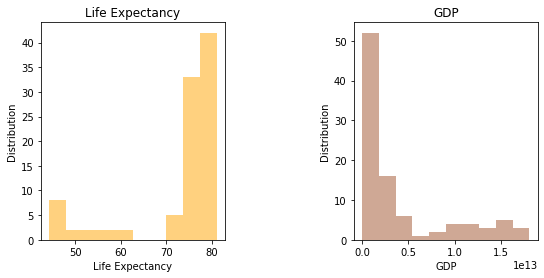

In [7]:
#create a histogram for life expectancy and GDP to show how they are distributed as a whole

plt.subplot(1,2,1)
plt.hist(le, color = 'orange', alpha=0.5)
plt.title('Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Distribution')

plt.subplot(1,2,2)
plt.hist(gdp, color='sienna', alpha=0.5)
plt.title('GDP')
plt.xlabel('GDP')
plt.ylabel('Distribution')

plt.subplots_adjust(left=0.05, right=1.2, wspace=0.7)
plt.show()

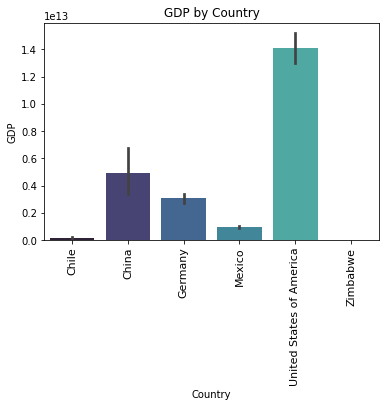

<Figure size 432x288 with 0 Axes>

In [8]:
#Create a bar chart from the data using country on the x-axis and GDP on the y-axis.
ax = sns.barplot(x='Country', y= 'GDP', palette='mako', data=df)
ax.set_xticklabels(labels=df.Country.unique(), rotation=90, fontsize=11)
plt.title('GDP by Country')
plt.show()
plt.savefig("GDP-BAR.png")

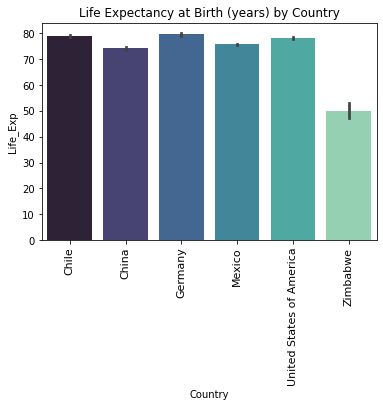

<Figure size 432x288 with 0 Axes>

In [9]:
#Create a bar chart with country on the x-axis and life expectancy on the y-axis. 
ax = sns.barplot(x='Country', y= 'Life_Exp', palette='mako', data=df)
ax.set_xticklabels(labels=df.Country.unique(), rotation=90, fontsize=11)
plt.title('Life Expectancy at Birth (years) by Country')
plt.show()
plt.savefig("LE-BAR.png")

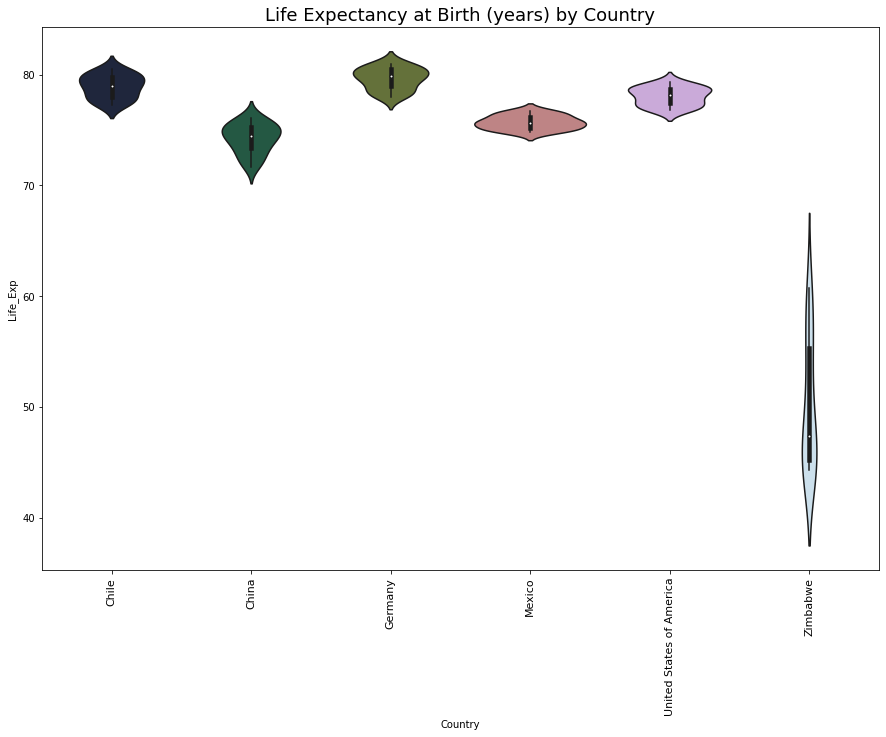

<Figure size 432x288 with 0 Axes>

In [10]:
#Create a violin plot showing the means, quartiles and spread of each country's life expectancy 
fig = plt.subplots(figsize=(15, 10)) 
sns.set_context('notebook')
ax = sns.violinplot(x=df['Country'], y=df['Life_Exp'], palette='cubehelix')
ax.set_xticklabels(labels=df.Country.unique(), rotation=90, fontsize=11)
plt.title('Life Expectancy at Birth (years) by Country', fontsize=18)
plt.show()
plt.savefig("Life Expectancy-VIOLIN.png")


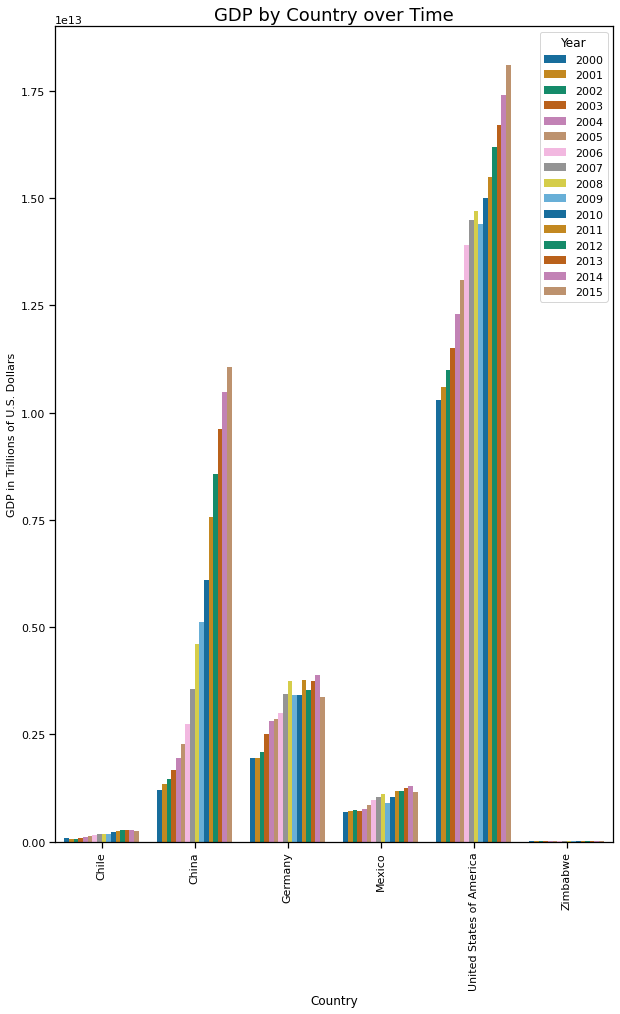

<Figure size 432x288 with 0 Axes>

In [11]:
#Create a barplot to show GDP for each country split by year 

f, ax = plt.subplots(figsize=(10, 15)) 
ax=sns.barplot(x='Country', y='GDP', hue='Year', data=df, palette='colorblind')
ax.set_xticklabels(labels=df.Country.unique(), rotation=90, fontsize=11)
plt.ylabel("GDP in Trillions of U.S. Dollars", fontsize=11)
plt.title('GDP by Country over Time', fontsize=18)
plt.show()
plt.savefig("GDP_ BAR2.png")


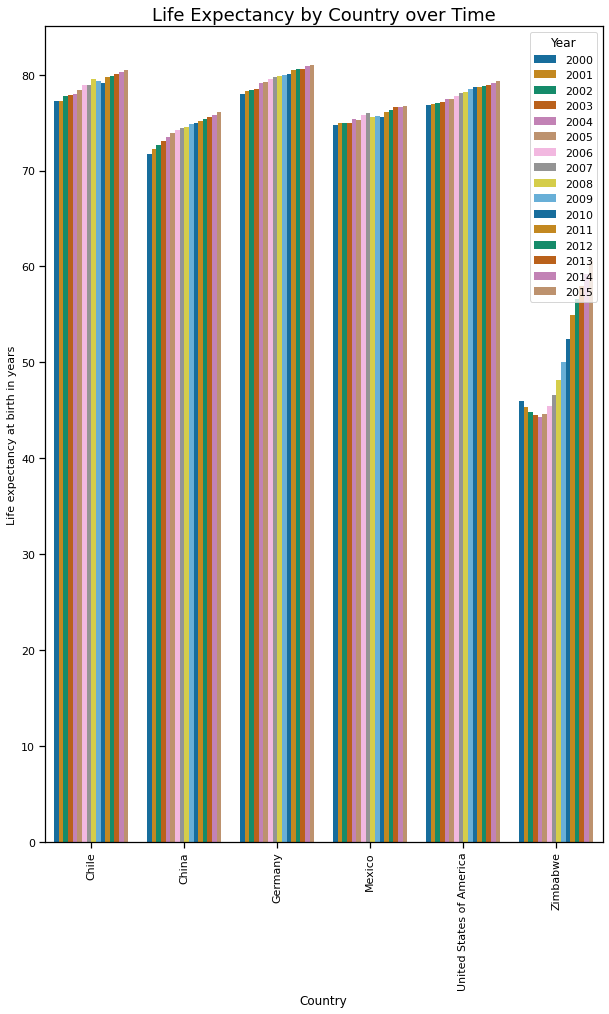

<Figure size 432x288 with 0 Axes>

In [12]:
#Create a barplot to show Life Expectancy for each country split by year 

f, ax = plt.subplots(figsize=(10, 15)) 
ax=sns.barplot(x='Country', y='Life_Exp', hue='Year', palette='colorblind', data=df)
ax.set_xticklabels(labels=df.Country.unique(), rotation=90, fontsize=11)
plt.ylabel("Life expectancy at birth in years", fontsize=11)
plt.title('Life Expectancy by Country over Time', fontsize=18)
plt.show()
plt.savefig("Life Expectancy BAR2.png")


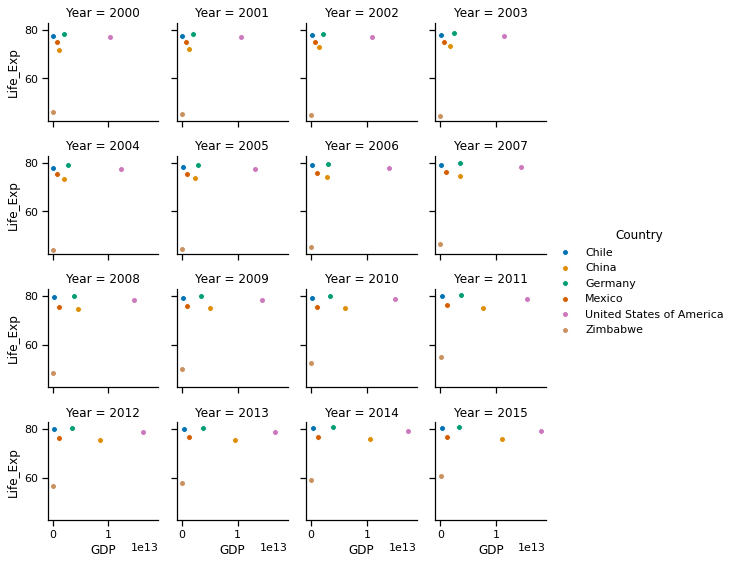

<Figure size 432x288 with 0 Axes>

In [13]:
#Facetgrid scatter plots of GDP and Life Expectancy Data
g = sns.FacetGrid(df, col='Year', hue='Country', palette='colorblind', col_wrap=4, height=2)
g = (g.map(plt.scatter, 'GDP', 'Life_Exp', edgecolor="w").add_legend())
plt.show()
plt.savefig("Life Expectancy FACET.png")

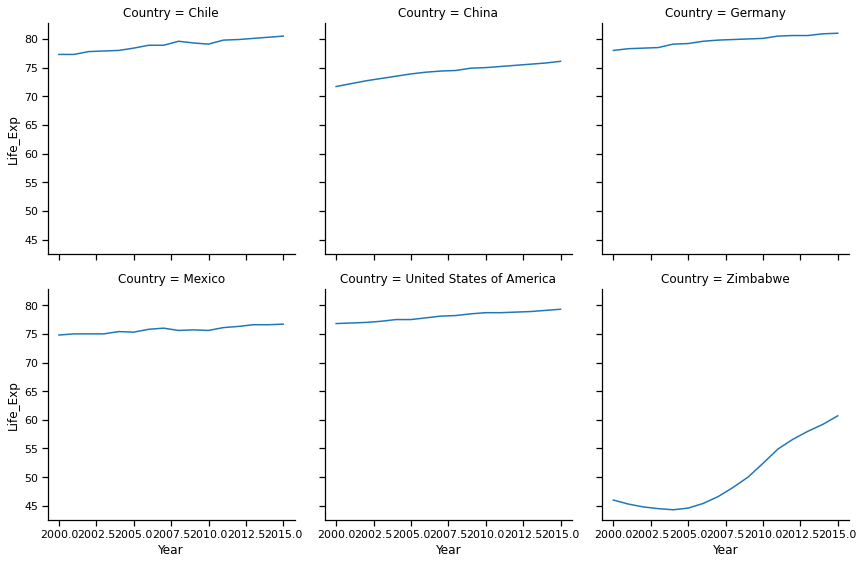

<Figure size 432x288 with 0 Axes>

In [14]:
#Facetgrid line plots for Life Expectancy
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, height=4)
g3 = (g3.map(plt.plot, "Year", "Life_Exp").add_legend())
plt.show()
plt.savefig("Life Expectancy FACET LINE.png")

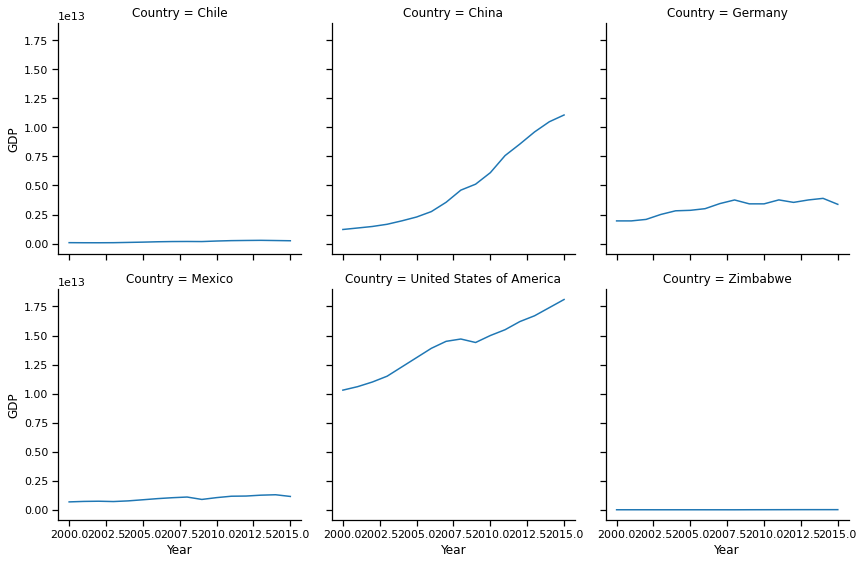

<Figure size 432x288 with 0 Axes>

In [15]:
#Facetgrid line plots for GDP
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, height=4)
g3 = (g3.map(plt.plot, "Year", "GDP").add_legend())
plt.show()
plt.savefig("GDP-FACET-LINE.png")

In [17]:
#create country specific dataframe for life expectancy
China_LE=China.Life_Exp
Chile_LE=Chile.Life_Exp
Germany_LE=Germany.Life_Exp
Mexico_LE=Mexico.Life_Exp
Zimbabwe_LE=Zimbabwe.Life_Exp
USA_LE=USA.Life_Exp
print(USA_LE.head())

64    76.8
65    76.9
66    77.0
67    77.2
68    77.5
Name: Life_Exp, dtype: float64


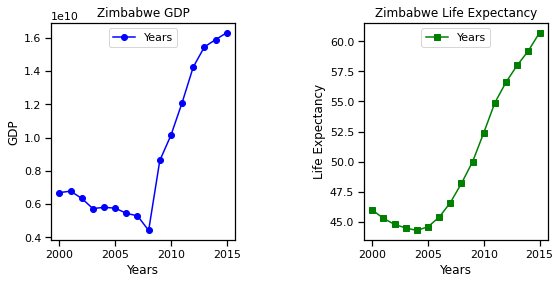

In [18]:
#take a closer look at Zimbabwe's GDP and Life expectancy by plotting these on side by side line graphs
plt.subplot(1,2,1)
plt.plot(Zimbabwe.Year, Zimbabwe.GDP, color='blue', marker='o')
plt.title('Zimbabwe GDP')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.legend(['Years', 'GDP'], loc=9)

plt.subplot(1,2,2)
plt.plot(Zimbabwe.Year, Zimbabwe.Life_Exp, color='green', marker='s')
plt.title('Zimbabwe Life Expectancy')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.legend(['Years', 'Life Expectancy'], loc=9)

plt.subplots_adjust(left=0.05, right=1.2, wspace=0.7)
plt.show()

In [37]:
#set up datafeames for hypothesis testing (one-way ttest)

avg_le=df.Life_Exp.mean()
print(avg_le)

72.78958333333335


In [41]:
#create a dataframe without the country whose average we will be testing
nzdf=df[df.Country != 'Zimbabwe']
ncndf=df[df.Country != 'China']
ncldf=df[df.Country != 'Chile']
nmdf=df[df.Country != 'Mexico']
nudf=df[df.Country != 'United States of America']
ngdf=df[df.Country != 'Germany']
print(ncldf.head())
print(nzdf.Life_Exp.mean())
print(ncndf.Life_Exp.mean())
print(ncldf.Life_Exp.mean())

#work out each country's average life expectancy 
avg_le_zim=Zimbabwe.Life_Exp.mean()
avg_le_chile=Chile.Life_Exp.mean()
avg_le_china=China.Life_Exp.mean()
avg_le_usa=USA.Life_Exp.mean()
avg_le_ger=Germany.Life_Exp.mean()
avg_le_mex=Mexico.Life_Exp.mean()

print(avg_le_zim)
print(avg_le_chile,
avg_le_china,
avg_le_usa,
avg_le_ger,
avg_le_mex)

   Country  Year  Life_Exp            GDP
16   China  2000      71.7  1211350000000
17   China  2001      72.2  1339400000000
18   China  2002      72.7  1470550000000
19   China  2003      73.1  1660290000000
20   China  2004      73.5  1955350000000
77.32875000000003
72.495
71.55875
50.09375000000001
78.94374999999998 74.26249999999999 78.0625 79.65625 75.71875


In [52]:
#run a one-way ttest to test the alternative hypothesis that the country's average life expectancy is different from the global average, and the null hypothesis that it is not.    
tstat, pval = ttest_1samp(nzdf.Life_Exp, avg_le_zim)
print("The one-sample ttest shows that the pval of Zimbabwe's average life expectancy when compared to the global average life expectancy is: ")
print(pval)
print("Zimbabwe's average life expectancy is: " + str(avg_le_zim) + " and the global average is: " + str(nzdf.Life_Exp.mean()))

tstat, pval = ttest_1samp(ncndf.Life_Exp, avg_le_china)
print("The one-sample ttest shows that the pval of China's average life expectancy when compared to the global average life expectancy is: ")
print(pval)
print("China's average life expectancy is: " + str(avg_le_china) + " and the global average is: " + str(ncndf.Life_Exp.mean()))
      
tstat, pval = ttest_1samp(ncldf.Life_Exp, avg_le_chile)
print("The one-sample ttest shows that the pval of Chile's average life expectancy when compared to the global average life expectancy is: ")
print(pval)
print("Chile's average life expectancy is: " + str(avg_le_chile) + " and the global average is: " + str(ncldf.Life_Exp.mean()))      
      
tstat, pval = ttest_1samp(nmdf.Life_Exp, avg_le_mex)
print("The one-sample ttest shows that the pval of Mexico's average life expectancy when compared to the global average life expectancy is: ")
print(pval)
print("Mexico's average life expectancy is: " + str(avg_le_mex) + " and the global average is: " + str(nmdf.Life_Exp.mean()))      
      
tstat, pval = ttest_1samp(ngdf.Life_Exp, avg_le_ger)
print("The one-sample ttest shows that the pval of Germany's average life expectancy when compared to the global average life expectancy is: ")
print(pval)
print("Germany's average life expectancy is: " + str(avg_le_ger) + " and the global average is: " + str(ngdf.Life_Exp.mean()))
      
tstat, pval = ttest_1samp(nudf.Life_Exp, avg_le_usa)
print("The one-sample ttest shows that the pval of USA's average life expectancy when compared to the global average life expectancy is: ")
print(pval)
print("USA's average life expectancy is: " + str(avg_le_usa) + " and the global average is: " + str(nudf.Life_Exp.mean()))

The one-sample ttest shows that the pval of Zimbabwe's average life expectancy when compared to the global average life expectancy is: 
1.4706352812307376e-87
Zimbabwe's average life expectancy is: 50.09375000000001 and the global average is: 77.32875000000003
The one-sample ttest shows that the pval of China's average life expectancy when compared to the global average life expectancy is: 
0.1792814551743123
China's average life expectancy is: 74.26249999999999 and the global average is: 72.495
The one-sample ttest shows that the pval of Chile's average life expectancy when compared to the global average life expectancy is: 
1.0687862179218956e-07
Chile's average life expectancy is: 78.94374999999998 and the global average is: 71.55875
The one-sample ttest shows that the pval of Mexico's average life expectancy when compared to the global average life expectancy is: 
0.008303280131667177
Mexico's average life expectancy is: 75.71875 and the global average is: 72.20375
The one-sample t

In [49]:
#create a dataframe without the country whose average we will be testing

ncnzdf=df[(df.Country != 'China') & (df.Country != 'Zimbabwe')]
nclzdf=df[(df.Country != 'Chile') & (df.Country != 'Zimbabwe')]
nmzdf=df[(df.Country != 'Mexico') & (df.Country != 'Zimbabwe')]
nuzdf=df[(df.Country != 'United States of America') & (df.Country != 'Zimbabwe')]
ngzdf=df[(df.Country != 'Germany') & (df.Country != 'Zimbabwe')]
print(nuzdf.head())
print(ncnzdf.Life_Exp.mean())
print(nclzdf.Life_Exp.mean())
print(ngzdf.Life_Exp.mean())

  Country  Year  Life_Exp          GDP
0   Chile  2000      77.3  77860932152
1   Chile  2001      77.3  70979923960
2   Chile  2002      77.8  69736811435
3   Chile  2003      77.9  75643459840
4   Chile  2004      78.0  99210392858
78.0953125
76.92500000000001
76.746875


In [53]:
#run a one-way ttest to test the alternative hypothesis that the country's average life expectancy is different from the global average, and the null hypothesis that it is not.  
#this time excluding Zimbabwe from the global average in case it is skewing results. 

tstat, pval = ttest_1samp(nzdf.Life_Exp, avg_le_zim)
print("The one-sample ttest shows that the pval of Zimbabwe's average life expectancy when compared to the global average life expectancy is: ")
print(pval)
print("Zimbabwe's average life expectancy is: " + str(avg_le_zim) + " and the global average is: " + str(nzdf.Life_Exp.mean()))

tstat, pval = ttest_1samp(ncnzdf.Life_Exp, avg_le_china)
print("The one-sample ttest shows that the pval of China's average life expectancy when compared to the global average life expectancy is: ")
print(pval)
print("China's average life expectancy is: " + str(avg_le_china) + " and the global average (excluding Zimbabwe) is: " + str(ncnzdf.Life_Exp.mean()))

tstat, pval = ttest_1samp(nclzdf.Life_Exp, avg_le_chile)
print("The one-sample ttest shows that the pval of Chile's average life expectancy when compared to the global average life expectancy is: ")
print(pval)
print("Chile's average life expectancy is: " + str(avg_le_chile) + " and the global average (excluding Zimbabwe) is: " + str(nclzdf.Life_Exp.mean()))

tstat, pval = ttest_1samp(nmzdf.Life_Exp, avg_le_mex)
print("The one-sample ttest shows that the pval of Mexico's average life expectancy when compared to the global average life expectancy is: ")
print(pval)
print("Mexico's average life expectancy is: " + str(avg_le_mex) + " and the global average (excluding Zimbabwe) is: " + str(nmzdf.Life_Exp.mean()))

tstat, pval = ttest_1samp(ngzdf.Life_Exp, avg_le_ger)
print("The one-sample ttest shows that the pval of Germany's average life expectancy when compared to the global average life expectancy is: ")
print(pval)
print("Germany's average life expectancy is: " + str(avg_le_ger) + " and the global average (excluding Zimbabwe) is: " + str(ngzdf.Life_Exp.mean()))

tstat, pval = ttest_1samp(nuzdf.Life_Exp, avg_le_usa)
print("The one-sample ttest shows that the pval of USA's average life expectancy when compared to the global average life expectancy is: ")
print(pval)
print("USA's average life expectancy is: " + str(avg_le_usa) + " and the global average (excluding Zimbabwe) is: " + str(nuzdf.Life_Exp.mean()))

The one-sample ttest shows that the pval of Zimbabwe's average life expectancy when compared to the global average life expectancy is: 
1.4706352812307376e-87
Zimbabwe's average life expectancy is: 50.09375000000001 and the global average is: 77.32875000000003
The one-sample ttest shows that the pval of China's average life expectancy when compared to the global average life expectancy is: 
3.4180837175058165e-26
China's average life expectancy is: 74.26249999999999 and the global average (excluding Zimbabwe) is: 78.0953125
The one-sample ttest shows that the pval of Chile's average life expectancy when compared to the global average life expectancy is: 
1.8307526230180135e-09
Chile's average life expectancy is: 78.94374999999998 and the global average (excluding Zimbabwe) is: 76.92500000000001
The one-sample ttest shows that the pval of Mexico's average life expectancy when compared to the global average life expectancy is: 
3.184676093840348e-09
Mexico's average life expectancy is: 7

In [42]:
#calculate covariance and correlation (pearsonr) on the Country specific datasets

covariance = np.cov(Zimbabwe.Life_Exp, Zimbabwe.GDP)
print("Covariance of Life Expectancy and GDP, Zimbabwe:")
print(covariance)

correlation, p= pearsonr(Zimbabwe.Life_Exp, Zimbabwe.GDP)

print("Correlation and p of Life Expectancy and GDP, Zimbabwe:")
print(correlation, p)

covariance = np.cov(USA.Life_Exp, USA.GDP)
print("Covariance of Life Expectancy and GDP, USA:")
print(covariance)

correlation, p= pearsonr(USA.Life_Exp, USA.GDP)

print("Correlation and p of Life Expectancy and GDP, USA:")
print(correlation, p)

covariance = np.cov(Germany.Life_Exp, Germany.GDP)
print("Covariance of Life Expectancy and GDP, Germany:")
print(covariance)

correlation, p= pearsonr(Germany.Life_Exp, Germany.GDP)

print("Correlation and p of Life Expectancy and GDP, Germany:")
print(correlation, p)

covariance = np.cov(Mexico.Life_Exp, Mexico.GDP)
print("Covariance of Life Expectancy and GDP, Mexico:")
print(covariance)

correlation, p= pearsonr(Mexico.Life_Exp, Mexico.GDP)

print("Correlation and p of Life Expectancy and GDP, Mexico:")
print(correlation, p)

covariance = np.cov(China.Life_Exp, China.GDP)
print("Covariance of Life Expectancy and GDP, China:")
print(covariance)

correlation, p= pearsonr(China.Life_Exp, China.GDP)

print("Correlation and p of Life Expectancy and GDP, China:")
print(correlation, p)

covariance = np.cov(Chile.Life_Exp, Chile.GDP)
print("Covariance of Life Expectancy and GDP, Chile:")
print(covariance)

correlation, p= pearsonr(Chile.Life_Exp, Chile.GDP)

print("Correlation and p of Life Expectancy and GDP, Chile:")
print(correlation, p)

covariance = np.cov(df.Life_Exp, df.GDP)
print("The global covariance of Life Expectancy and GDP:")
print(covariance)

correlation, p= pearsonr(df.Life_Exp, df.GDP)

print("The global correlation and p of Life Expectancy and GDP:")
print(correlation, p)

Covariance of Life Expectancy and GDP, Zimbabwe:
[[3.52872917e+01 2.46702663e+10]
 [2.46702663e+10 1.84754650e+19]]
Correlation and p of Life Expectancy and GDP, Zimbabwe:
0.9661998955858777 1.2358516366846197e-09
Covariance of Life Expectancy and GDP, USA:
[[6.93166667e-01 1.98833333e+12]
 [1.98833333e+12 5.91800000e+24]]
Correlation and p of Life Expectancy and GDP, USA:
0.9817092382430257 1.7499709269099464e-11
Covariance of Life Expectancy and GDP, Germany:
[[9.50625000e-01 6.06999596e+11]
 [6.06999596e+11 4.45537891e+23]]
Correlation and p of Life Expectancy and GDP, Germany:
0.9326988982561268 1.401881553404592e-07
Covariance of Life Expectancy and GDP, Mexico:
[[3.85625000e-01 1.21322621e+11]
 [1.21322621e+11 4.39202745e+22]]
Correlation and p of Life Expectancy and GDP, Mexico:
0.9322377167847081 1.4686960248305143e-07
Covariance of Life Expectancy and GDP, China:
[[1.73716667e+00 4.19239195e+12]
 [4.19239195e+12 1.22576718e+25]]
Correlation and p of Life Expectancy and GDP, Ch

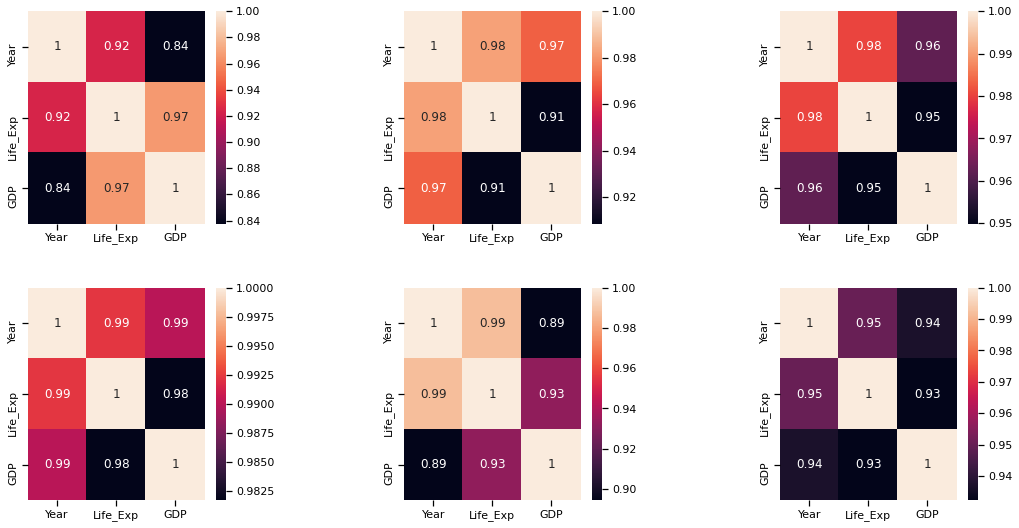

In [43]:
# Plot correlation between GDP and life expectancy on a correlation heatmap.
plt.figure(figsize=(8, 9))
plt.subplot(2,3,1)
ax = sns.heatmap(Zimbabwe.corr(), annot=True)

plt.subplot(2,3,2)
ax = sns.heatmap(China.corr(), annot=True)

plt.subplot(2,3,3)
ax = sns.heatmap(Chile.corr(), annot=True)

plt.subplot(2,3,4)
ax = sns.heatmap(USA.corr(), annot=True)

plt.subplot(2,3,5)
ax = sns.heatmap(Germany.corr(), annot=True)

plt.subplot(2,3,6)
ax = sns.heatmap(Mexico.corr(), annot=True)

plt.subplots_adjust(left=0.01, right=1.7, wspace=0.7, hspace=0.3)
plt.show()